# Importing Dictionaries and Setting Up The Lists

In [236]:
import math
import numpy as np
import random
import statistics as s
import matplotlib.pyplot as plt


state_list = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
    'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana',
    'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
    'Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas',
    'Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

population_list = [4_486_508,643_786,5_456_453,2_710_079,35_116_033,4_506_542,3_460_503,807_385,
                   16_713_149,8_560_310,1_244_898,1_341_131,12_600_620,6_159_068,2_936_760,2_715_884,
                   4_092_891,4_482_646,1_294_464,5_458_137,6_427_801,10_050_446,5_019_720,2_871_782,
                   5_672_579,909_453,1_729_180,2_173_491,1_275_056,8_590_300,1_855_059,19_157_532,
                   8320146,634110,11421267,3493714,3521515,12335091,1069725,4107183,
                   761063,5797289,21779893,2316256,616592,7293542,6068996,1801873,
                   5441196,498703]
log_list = []


dict1 = {}
dict2 = {}

for x in population_list:
    log_list.append(np.log(x))
    
counter = 0
for state in state_list:
    dict1[state] = population_list[counter]
    dict2[state] = log_list[counter]
    counter+=1
    

    


# Create A Function to Run samples of a Specific Size
#### Function Returns a list of the sampled means

In [237]:
def random_samples(num_trials=1, size=5, log=False):
    """Run a specfied number of samples of a specific size. The sample returns a range for which population mean may lie
    within 2 standard deviations"""
    sample_mean_list = []
    rng = np.random.default_rng()
    
    for x in range(0, num_trials):
        rand_samp = rng.choice(50,size, replace=False)
        
        trial_list = []
        
        if log:
            for n in rand_samp:
                n = state_list[n]
                trial_list.append(dict2[n])
        else:
            for n in rand_samp:
                n = state_list[n]
                trial_list.append(dict1[n])
            
        sample_mean = s.mean(trial_list)
        sample_mean_list.append(sample_mean)
    
    return sample_mean_list

# Plot Some Trials

#### Data is skewed due to small sample size 

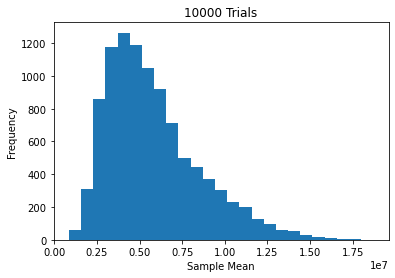

In [242]:
x = random_samples(10_000)

num_bins = 25

plt.hist(x, num_bins)
plt.title(f'{len(x)} Trials')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.show()

# Log-Transforming the Data

#### Log-Transforming the data results in a more normal distribution

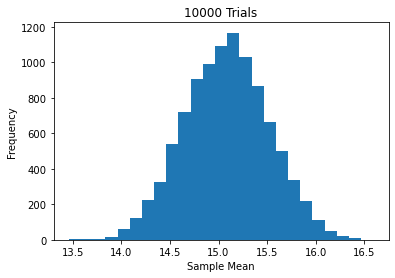

In [243]:
x = random_samples(10_000, 5, True)

num_bins = 25

plt.hist(x, num_bins)
plt.title(f'{len(x)} Trials')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.show()

# Create a Function to return the Estimated Population Range based on the Sample Mean

#### Function returns the estimated population range based on calculated std. deviation and mean (adjusted for finite population)

In [332]:
def random_samples_range(num_trials=1, size=5, log=False):
    """Run a specfied number of samples of a specific size. The sample returns a range for which population mean may lie
    within 2 standard deviations"""
    sample_mean_list = []
    sample_std_list = []
    rng = np.random.default_rng()
    
    for x in range(0, num_trials):
        rand_samp = rng.choice(50,size, replace=False)
        
        trial_list = []
        
        if log:
            for n in rand_samp:
                n = state_list[n]
                trial_list.append(dict2[n])

            sample_mean = s.mean(trial_list)
            sample_mean_list.append(sample_mean)
            sample_std = s.stdev(trial_list)
            sample_std_list.append(sample_std)
        
        else:
            for n in rand_samp:
                n = state_list[n]
                trial_list.append(dict1[n])

            sample_mean = s.mean(trial_list)
            sample_mean_list.append(sample_mean)
            sample_std = s.stdev(trial_list)
            sample_std_list.append(sample_std)
    
    pop_total = len(state_list) * s.mean(sample_mean_list)
    std_dev = s.mean(sample_std_list)
    var_est = (50**2) * (1 - size/50) * ((std_dev**2)/size)
    bound = 2*math.sqrt(var_est)
    pop_range = [-bound, bound]
    
    #print(f'Random States: {trial_list}\n')
    #print(f'The mean population is: {sample_mean}\n')
    #print(f"The estimated population total is: {pop_total}\n")
    #print(f'The Standard Deviation of the sample is: {std_dev}\n')
    #print(f'The estimated bounded error is: {bound}\n')
    #print(f'The estimated population range is: {pop_range}')
    #print(f'{sample_std_list}')
    return pop_total, bound
        

# Plotting Error bars for a Series of Trials

#### Compute the number of trials that result in a range that contains the true population mean

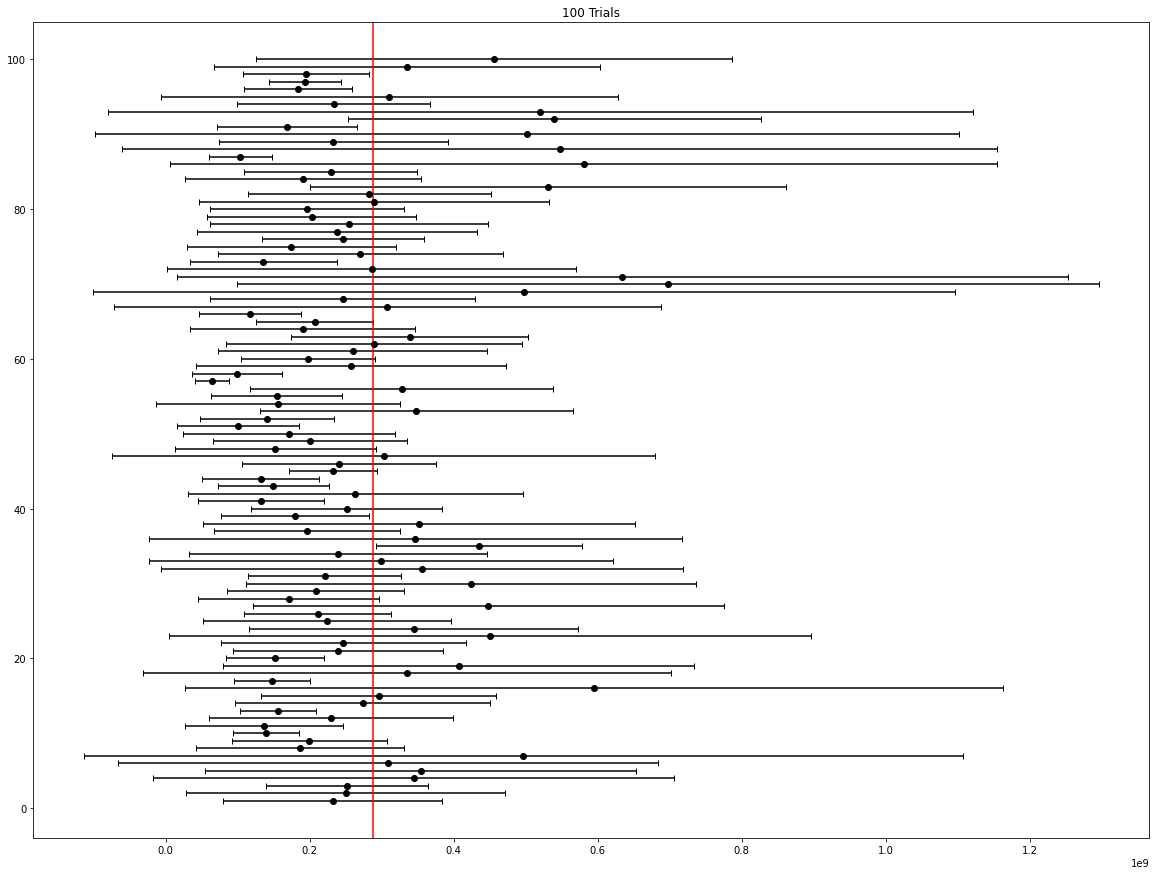

{77}


In [362]:
trial_nums = 100
in_range = 0


plt.rcParams['figure.figsize'] = [20,15]

for n in range(1,trial_nums+1):
    x, xerr = random_samples_range()
    y = [n]
    plt.errorbar(x=x,y=y,xerr=xerr, color='black', fmt='o', capsize=3)
    
    if x-xerr <= sum(population_list) <= x+xerr:  
        in_range +=1
    
    

plt.axvline(x=sum(population_list), color='r')
plt.title(f'{n} Trials')
plt.show()
print({in_range})


# Plotting Log-Adjusted Error Bars

#### Results in a greater number of intervals containing the true population mean

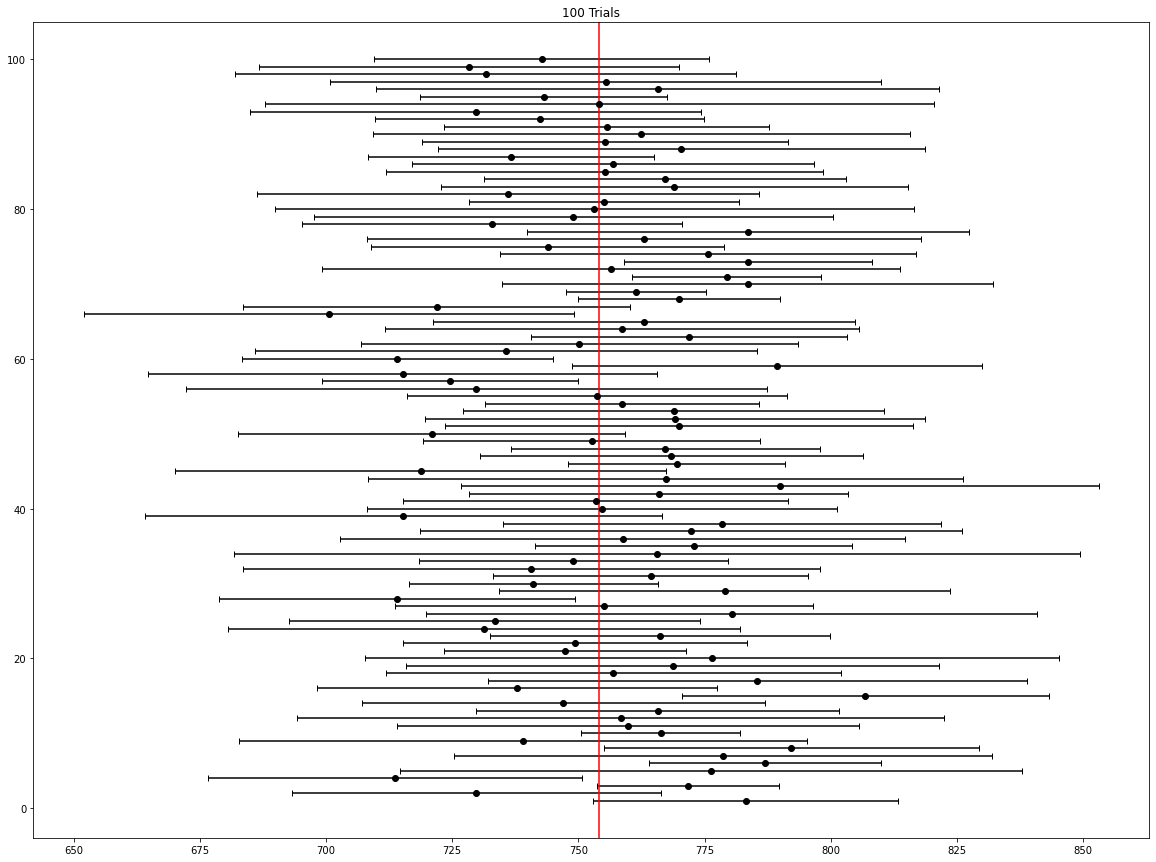

{90}


In [363]:
trial_nums = 100
in_range = 0


plt.rcParams['figure.figsize'] = [20,15]

for n in range(1,trial_nums+1):
    x, xerr = random_samples_range(1,5,True)
    y = [n]
    plt.errorbar(x=x,y=y,xerr=xerr, color='black', fmt='o', capsize=3)
    
    if x-xerr <= sum(log_list) <= x+xerr:  
        in_range +=1
    
    

plt.axvline(x=sum(log_list), color='r')
plt.title(f'{n} Trials')
plt.show()
print({in_range})